In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy 
import scipy.stats

In [118]:
data = pd.read_csv(r"/content/income.csv")

In [119]:
data.head()

,Parent 1 Highest Grade,Race,Sex,Self Esteem Score,AFQT Percentile Score,Type of Residence 1983,Average Drinks 2008,Highest Grade,Fam Size 1979,Foreign Language,Library Card,Parent Cohabitation,Number Siblings,First Marijuana Use,Income 2018
0,12,3,2,-5,-4,-5,-5,12,5,1,1,-4,1,-5,-5
1,8,3,2,16,6841,-4,-4,12,5,1,1,-4,8,-4,25000
2,10,3,2,20,49444,11,2,12,5,0,1,-4,3,12,80000
3,10,3,2,-5,55761,11,-5,14,5,0,0,-4,3,-5,0
4,13,3,1,23,96772,3,-5,18,4,0,1,-4,1,-5,-5


In [120]:
# data cleanUp 1: change all negative values to -1 (~ N/A)
for col in data:
    # for each column
    data.loc[(data[col] < 0), col] = -1

# data cleanUp 2: drop all rows where Income 2018 is N/A (i.e. -1)
    data.drop(data[data["Income 2018"] < 0].index, inplace=True)
    
# data cleanUp 3: separate y (Income 2018) from features (rest of columns)
y = list(data["Income 2018"])
data = data.drop("Income 2018", axis=1)

In [122]:
# data.reset_index(inplace=True)

In [91]:
data = data.sample(frac = 1, random_state = 2) # we shuffle the data so that our train/test split will be truly random
y = y.sample(frac = 1)

In [125]:
train_proportion = 0.8
valid_proportion = .1
n = len(data)
print('Size of dataset: ', str(n))

# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
t = int(train_proportion * n)
v = int(valid_proportion * n)

target = y

# Split into x and y training, validation, and test sets
train_x = data.iloc[:t]
test_x = data.iloc[(v+t):]
valid_x = data.iloc[t:(v+t)]
valid_y = target[t:(v+t)]
train_y = target[:t]
test_y = target[(v+t):]

print(train_x.shape,valid_x.shape,test_x.shape)
print(valid_x.head)

Size of dataset:  6571
(5256, 16) (657, 16) (658, 16)
<bound method NDFrame.head of       level_0  index  ...  Number Siblings  First Marijuana Use
5256     5256   8585  ...                4                   -1
5257     5257   8587  ...                4                   17
5258     5258   8596  ...                8                   16
5259     5259   8603  ...                4                   14
5260     5260   8604  ...                4                   -1
...       ...    ...  ...              ...                  ...
5908     5908  10072  ...                7                   20
5909     5909  10074  ...                8                   16
5910     5910  10076  ...                5                   -1
5911     5911  10077  ...                5                   -1
5912     5912  10078  ...                4                   -1

[657 rows x 16 columns]>


w = [-76821.1571673    9051.22366675]


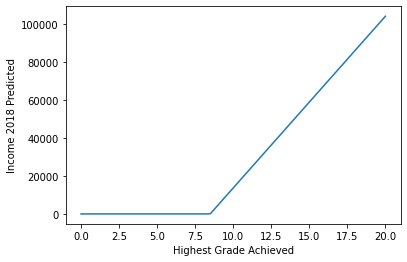

In [126]:
# fit an example linear model: use Highest Grade to predict Income 2018

# 1. fill in N/As in Highest Grade with Average Grade of all interviewees
x = np.asarray(data.loc[:, "Highest Grade"])
mean = np.mean(x)
x[x < 0] = mean

# 2. fit the linear model
x = np.reshape(x, (len(x), 1))
x = np.concatenate([np.ones(x.shape), x], axis=1) # add offset
w = np.linalg.solve(np.matmul(x.T, x), x.T@y)
print('w = ' + str(w))

# 3. plot the Grade - Income model
xfp = np.arange(np.min(x), np.max(x) + 0.1, 0.1)
vals = np.asarray([w[0] + w[1]*xfp[i] for i in range(len(xfp))])
vals[vals < 0] = 0 # attenuate negative predicted income to 0. Otherwise negative income does not make sense.
plt.plot(xfp, vals)
plt.ylabel("Income 2018 Predicted")
plt.xlabel("Highest Grade Achieved")
plt.show()

In [129]:
labels_real = [
    'Parent 1 Highest Grade',
#    'Self Esteem Score',
#    'AFQT Percentile Score',
#    'Average Drinks 2008',
    'Highest Grade',
#    'Fam Size 1979',
#    'Number Siblings',
    'Foreign Language']
#    'Library Card',
#    'Parent Cohabitation',
#    'First Marijuana Use']

for label in labels_real:
    x = np.asarray(data.loc[:, label])
    mean = np.mean(x)
    x[x < 0] = mean

In [130]:
labels_cat = [
    'Race',
    'Sex',
    'Type of Residence 1983']

for label in labels_cat:
    x = np.asarray(data.loc[:, label])
    x[x < 0] = 0

In [131]:
cats_sets = [train_x.loc[:, label].fillna('NaN').unique() for label in labels_cat]

def onehot(column=None, col=None):
    column = column.astype(pd.CategoricalDtype(categories = col))
    one_hot = pd.get_dummies(column)      
    return np.asarray(one_hot)

d = np.zeros((len(train_x),1))
for i in range(len(labels_cat)):
  d = np.concatenate((d,onehot(train_x[labels_cat[i]],cats_sets[i])),axis=1)
print(d.shape,d)

l = np.zeros((len(valid_x),1))
for i in range(len(labels_cat)):
  l = np.concatenate((l,onehot(valid_x[labels_cat[i]],cats_sets[i])),axis=1)
print(l.shape,l)

s = np.zeros((len(test_x),1))
for i in range(len(labels_cat)):
  s = np.concatenate((s,onehot(test_x[labels_cat[i]],cats_sets[i])),axis=1)
print(s.shape,s)

(5256, 18) [[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(657, 18) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
(658, 18) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [132]:
train_labels = np.concatenate((train_x[labels_real], d[:,1:]),axis=1)
valid_labels = np.concatenate((valid_x[labels_real], l[:,1:]),axis=1)
test_labels = np.concatenate((test_x[labels_real], s[:,1:]),axis=1)

In [ ]:
# Fit the linear model
def lin_model(train_x, y, test_x, length):
    X = np.column_stack([train_x, np.ones(length)])
    w = np.linalg.lstsq(X, y,rcond = None)[0]
    pred = np.matmul(test_x,w[:-1])
    return pred

# Return mean squared error
def MSE(y, pred):
    return (np.mean(np.power(np.subtract(y,pred),2)))

In [ ]:
train_pred = lin_model(train_labels,train_y,train_labels,t)
print(MSE(train_y,train_pred))
valid_pred = lin_model(train_labels,train_y,valid_labels,t)
print(MSE(valid_y,valid_pred))
print((np.mean(np.abs(np.subtract(valid_y,valid_pred)))))

4917815086.299643
5152622606.792143
39900.22144706821


## Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [73]:
train_data = np.concatenate((train_labels,valid_labels),axis = 0)
train_label = np.concatenate((train_y,valid_y),axis = 0)
print(train_data.shape, train_label.shape)

(5913, 20) (5913,)


In [74]:
lr = LinearRegression().fit(train_data, train_label)
pred = lr.predict(test_labels)

In [75]:
print("MSE :",mean_squared_error(pred,test_y))
print("RMSE",math.sqrt(mean_squared_error(pred, test_y)))

MSE : 3963709704.370135
RMSE 62957.99952643139


## Decision TreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
lr = DecisionTreeRegressor(max_depth=2).fit(train_data, train_label)
pred = lr.predict(test_labels)
print("MSE :",mean_squared_error(pred,test_y))
print("RMSE",math.sqrt(mean_squared_error(pred, test_y)))

MSE : 3664468649.775738
RMSE 60534.85483401887


## SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
lr = SVR().fit(train_data, train_label)
pred = lr.predict(test_labels)
print("MSE :",mean_squared_error(pred,test_y))
print("RMSE",math.sqrt(mean_squared_error(pred, test_y)))

MSE : 3917871960.804342
RMSE 62592.90663329465


## Laso Regressor

In [ ]:
from sklearn import linear_model

In [ ]:
lassoReg = linear_model.Lasso(alpha=0.1)
lr = lassoReg.fit(train_data, train_label)
pred = lr.predict(test_labels)
print("MSE :",mean_squared_error(pred,test_y))
print("RMSE",math.sqrt(mean_squared_error(pred, test_y)))

MSE : 3658663593.267872
RMSE 60486.887779649165


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.977e+11, tolerance: 2.541e+09
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=20, n_informative=10, random_state=0, shuffle=False)
rfr = RandomForestRegressor(max_depth=3)

In [ ]:
lr = rfr.fit(X, y)
pred = lr.predict(test_labels)
print("MSE :",mean_squared_error(pred,test_y))
print("RMSE",math.sqrt(mean_squared_error(pred, test_y)))

MSE : 5675218195.787059
RMSE 75334.04406898025


## Income for 2019

In [136]:
train_data = np.concatenate((train_labels,valid_labels,test_labels),axis = 0)
print(train_data.shape)

(6571, 20)


In [137]:
# lr = LinearRegression().fit(train_data, train_label)
pred = lr.predict(train_data)

In [140]:
data['Income of 2018'] = y
data['Income of 2019'] = pred
data.head(10)

,level_0,index,Parent 1 Highest Grade,Race,Sex,Self Esteem Score,AFQT Percentile Score,Type of Residence 1983,Average Drinks 2008,Highest Grade,Fam Size 1979,Foreign Language,Library Card,Parent Cohabitation,Number Siblings,First Marijuana Use,Income of 2019,Income of 2018
0,0,1,8,3,2,16,6841,0,-1,12,5,1,1,-1,8,-1,45069.260695,25000
1,1,2,10,3,2,20,49444,11,2,12,5,0,1,-1,3,12,44130.897964,80000
2,2,3,10,3,2,-1,55761,11,-1,14,5,0,0,-1,3,-1,43878.658777,0
3,3,5,12,3,1,27,99393,17,2,16,4,0,1,-1,1,17,41942.133409,117000
4,4,7,12,3,2,23,44022,11,8,14,3,1,1,1,7,15,43488.234041,51313
5,5,14,8,3,1,23,82260,3,3,16,4,0,1,-1,1,-1,43070.479445,0
6,6,15,12,3,2,25,50283,17,2,13,4,0,1,-1,3,17,41270.461809,90000
7,7,16,13,3,1,24,89669,0,-1,13,2,0,1,-1,2,16,44569.670662,69000
8,8,17,12,3,1,28,95977,11,3,13,1,0,1,-1,2,14,44536.544307,150000
9,9,20,11,3,2,28,88416,17,2,16,5,0,1,-1,2,15,41151.235250,0


In [141]:
data.to_csv('/content/test/income_final.csv')